<h3> Importando as bibliotecas Pandas, Seaborn e SciKit Learn </h3>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(42)
warnings.filterwarnings(action='once')

<h3>Lendo dados dos individuos (X1 e X2) e preparando o indivíduo (PONTO) a ser classificado</h3>

In [4]:
ponto = (3.5, 3.5)
dataFrame = pd.read_csv('https://raw.githubusercontent.com/inf032/introducaoML/master/data/x1_x2.csv')
dataFrame

,X1,X2,TIPO
0,5.0,1.0,1
1,3.0,2.0,1
2,5.5,2.5,1
3,4.0,3.0,1
4,6.0,3.5,1
5,2.5,4.0,2
6,3.0,4.5,2
7,2.0,6.0,2
8,2.0,7.0,2
9,3.0,7.0,2


<h3>Representando os indivíduos graficamente</h3>

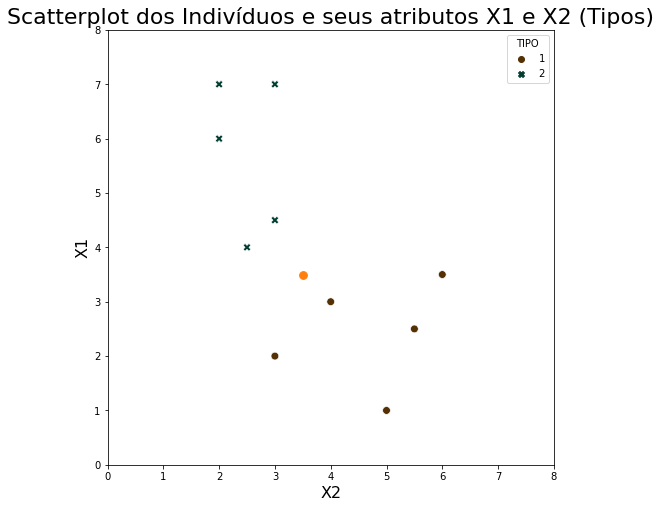

In [5]:
f, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Scatterplot dos Indivíduos e seus atributos X1 e X2 (Tipos)', fontsize=22)

sns.scatterplot(x='X1', y='X2', data=dataFrame, ax=ax, hue=dataFrame.TIPO, style=dataFrame.TIPO, 
                palette = "BrBG", s=60)
ax.set_ylabel('X1', fontsize=16)
ax.set_xlabel('X2', fontsize=16)

ax.set_xlim(xmin=0, xmax=8)
ax.set_ylim(ymin=0, ymax=8)

plt.scatter(ponto[0], ponto[1], s=60)


plt.show()

<h3>Classificando o ponto com um classificador k-nearest neighbors (KNN)</h3>

In [6]:
from sklearn.neighbors import KNeighborsClassifier

neighbours = 1

knn = KNeighborsClassifier(n_neighbors=neighbours).fit(dataFrame[['X1', 'X2']], dataFrame.TIPO)
pontoNovo = {'X1' : ponto[0],  'X2' :ponto[1]}
dfPontoNovo = pd.DataFrame.from_dict(data = pontoNovo, orient='index').T
tipo = knn.predict(dfPontoNovo)[0]
print(f'Tipo do ponto: {tipo}')

Tipo do ponto: 1


<h3>Variação do valor de N</h3>

In [9]:
for n in range(1, 5):
  knn = KNeighborsClassifier(n_neighbors=n).fit(dataFrame[['X1', 'X2']], dataFrame.TIPO)
  dfPontoNovo = pd.DataFrame.from_dict(data = pontoNovo, orient='index').T
  tipo = knn.predict(dfPontoNovo)[0]
  print(f'Tipo do ponto: {tipo} considerando {n} neighbors')


Tipo do ponto: 1 considerando 1 neighbors
Tipo do ponto: 1 considerando 2 neighbors
Tipo do ponto: 2 considerando 3 neighbors
Tipo do ponto: 1 considerando 4 neighbors
